# Exercise 1: Linear Regression

The *bodyfat* data set contains several body measurements that can be done using a scale and a tape measure. These can be used to predict the body fat percentage (`body.fat` column). Measuring body fat requires a special apparatus; if our resulting model fits well, we have a low-cost alternative. The measurements are age, weight, height, BMI, neck, chest, abdomen, hip, thigh, knee, ankle, bicep, forearm, and wrist.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

,body.fat,age,weight,height,BMI,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


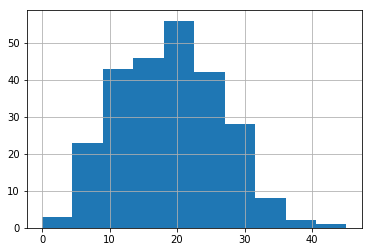

In [2]:
bodyfat = pd.read_csv(Path('../datasets/bodyfat.csv'))

bodyfat['body.fat'].hist()
bodyfat.head()

## Task 1

*Create a function that takes a data matrix $\mathbf{X} \in \mathbb{R}^{n \times m}$ of measurements and a vector $\mathbb{y} \in \mathbb{R}^n$ of body fat content. The function should return the **ordinary least squares (OLS)** estimate of the coefficients $\beta$ (including the intercept).*

First, we standardize the training data to have zero mean and unit variance by substracing the empirical mean and dividing by the standard deviation. This ensures that all our predictors are on the same scale, which has two major advantages:

1. We can directly compare the coefficients (slopes) to determine which feature is most predictive.
2. The optimization becomes numerically more stable and less dependent on choosing the right scale for the learning rate, which would lead divergence otherwise.

Remember that after standardisation, we have
$$
\sum_{i=1}^n x_{i,j} = 0 \quad \forall j \in \{1,\ldots,m\} \\
\frac{1}{n} \sum_{i=1}^n x_{i,j}^2 = 1 \quad \forall j \in \{1,\ldots,m\} \\
$$

Therefore, after setting the derivative with respect to the intercept to zero, we obtain
$$
-\sum_{i=1}^n (y_i - \beta_0 - \mathbf{x}_i^\top \beta) = 0 \\
\sum_{i=1}^n \beta_0 + \sum_{i=1}^n \sum_{j=1}^m x_{i,j} \beta_j = \sum_{i=1}^n y_i \\
n \beta_0 + \sum_{j=1}^m \beta_j \underbrace{\sum_{i=1}^n x_{i,j}}_{=0} = \sum_{i=1}^n y_i \\
\beta_0 = \frac{1}{n} \sum_{i=1}^n y_i .
$$

Assuming there is only a single predictor $\beta_1$, setting the derivative with respect to $\beta_1$ to zero, we obtain
$$
\sum_{i=1}^n -x_{i,1} (y_i - \beta_0 - x_{i,1} \beta_1) = 0 \\
\beta_1 \sum_{i=1}^n x_{i,1}^2 = \sum_{i=1}^n x_{i,1} y_i - \beta_0 \underbrace{\sum_{i=1}^n x_{i,1}}_{=0} \\
\beta_1 \underbrace{ \frac{1}{n} \sum_{i=1}^n x_{i,1}^2 }_{=1} = \frac{1}{n} \sum_{i=1}^n x_{i,1} y_i \\
\beta_1 = \frac{1}{n} \sum_{i=1}^n x_{i,1} y_i .
$$

In [3]:
def fit_ols_simple(X, y):
    """Fit an ordinary least squares model `y = intercept + slope * X`

    Parameters
    ----------
    X : array-like, shape=(n_samples,)
        A vector of values for a single feature.

    y : array-like, shape=(n_samples,)
        A vector of output variables to regress on.

    Returns
    -------
    predict_func : callable
        A function to perform predictions
        using the estimated model.

    intercept : float
        The value of the intercept.

    slope : float
        The value of the slope.
    """
    x = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    assert x.ndim == 1, 'x has more than one feature: {}'.format(x.ndim)

    # standardize the features by substracting the mean
    # dividing by the standard deviation
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x_train_std = (x - x_mean) / x_std

    # compute the intercept and slope in closed form
    intercept = np.mean(y)    
    slope = np.mean(x_train_std * y)

    # create a function for prediction, where we standardize
    # the data the same way as in training.
    def do_predict_simple(X_test):
        x_test = np.asarray(X_test, dtype=np.float64)
        x_test_std = (x_test - x_mean) / x_std

        # do the prediction
        y_pred = intercept + x_test_std * slope
        return y_pred

    return do_predict_simple, intercept, slope

## Task 2

*Create multiple models that predict the amount of body fat based on one of the 14 features mentioned above, respectively. For each model create a scatter plot which depicts the data and the model.*

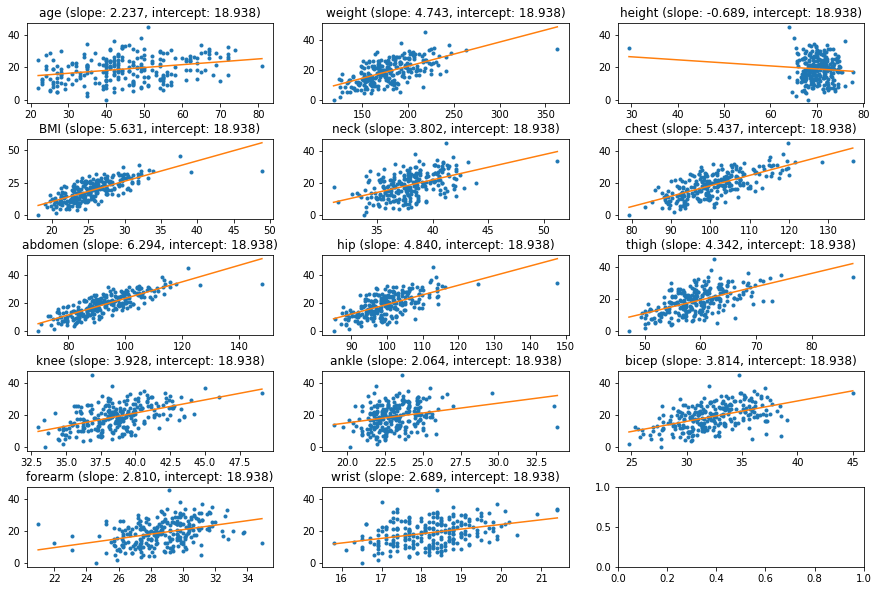

In [4]:
bodyfat_features = bodyfat.drop('body.fat', axis=1)
fig, axs = plt.subplots(5, 3, figsize=(15, 10), gridspec_kw={'hspace': 0.45})
for i, (name, values) in enumerate(bodyfat_features.iteritems()):
    f, intercept, slope = fit_ols_simple(values, bodyfat['body.fat'])

    ax = axs.flat[i]
    x = np.linspace(values.min(), values.max(), 100)
    ax.plot(values, bodyfat['body.fat'], '.')
    ax.plot(x, f(x))
    ax.set_title('%s (slope: %.3f, intercept: %.3f)'% (name, slope, intercept))

## Task 3

*Create a single model that contains all of the 14 features mentioned above. Which features have the highest/lowest coefficients?*

For the multivariate model with $m$ features, the input becomes a matrix (2-D tensor) instead of a vector (1-D tensor) and instead of just slope and intercept, we need to estimate intercept and $m$ coefficients.
Hence, our linear predictor becomes:
$$
y_i = \text{intercept} + \sum_{j=1}^m x_{ij} \beta_j ,
$$
or in matrix form
$$
\mathbf{y} = \text{intercept} + \mathbf{X} \beta .
$$

To compute the matrix-vector product $\mathbf{X} \beta$ we will be using ``np.dot``.

In [5]:
import numpy as np

def fit_ols_multivariate(X, y):
    """Fit multivariate ordinary least squares model `y = intercept + X @ coefficients`,
    where `@` denotes the matrix multiply.

    Parameters
    ----------
    X : array-like, shape=(n_samples, n_features)
        A vector of values for a single feature.

    y : array-like, shape=(n_samples,)
        A vector of output variables to regress on.

    Returns
    -------
    predict_func : callable
        A function to perform predictions
        using the estimated model.

    intercept : float
        The value of the intercept.

    coef : ndarray, shape=(n_features,)
        The value of the coefficients.
    """
    x = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    assert x.ndim == 2, 'x must be a matrix'
    n_features = x.shape[1]

    # standardize the features by substracting the mean
    # dividing by the standard deviation
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x_train_std = (x - x_mean) / x_std

    # compute the intercept and coefficients in closed form
    intercept = np.mean(y)
    XtX = np.dot(x_train_std.T, x_train_std)
    Xty = np.dot(x_train_std.T, y)
    coef = np.linalg.solve(XtX, Xty)

    # create a function for prediction, where we standardize
    # the data the same way as in training.
    def do_predict_multivariate(X_test):
        x_test = np.asarray(X_test, dtype=np.float64)
        x_test_std = (x_test - x_mean) / x_std

        # do the prediction
        y_pred = intercept + np.dot(x_test_std, coef)
        return y_pred

    return do_predict_multivariate, intercept, coef

Let's train the model.

In [6]:
f, intercept, coef, = fit_ols_multivariate(
    bodyfat_features, bodyfat['body.fat'])

coef = pd.Series(coef.ravel(), bodyfat_features.columns)

print(intercept)
print(coef)

18.9384920635
age        0.715374
weight    -2.384656
height    -0.194004
BMI        0.222113
neck      -1.079522
chest     -0.259706
abdomen    9.459251
hip       -1.451888
thigh      1.191347
knee      -0.002389
ankle      0.265919
bicep      0.447802
forearm    0.866502
wrist     -1.378265
dtype: float64


From the result above, we can see that the coefficient of *abdomen* has largest magnitude of all coefficients, consequently it has the highest impact on predicting body fat, whereas *knee* is the least important measurement.